# Response Themes for "What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?"

* Goal: Extract theme keywords from `integrations` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Strawman process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [3]:
rs = np.random.RandomState(123)

In [4]:
pd.set_option('max_colwidth', 1000)

In [5]:
df = pd.read_csv('survey_short_columns.csv')

In [6]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

Concat all three integration response columns into one. We don't care about order at the moment.

In [7]:
responses = pd.concat([df.integrations_1, df.integrations_2, df.integrations_3])

In [8]:
assert len(responses) == len(df) * 3

For later ref, to keep the notebook code generic for other questions.

In [9]:
column = 'integrations'

In [10]:
responses.isnull().value_counts()

True     3861
False    1257
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) pandas - better table viewing and printing

1) Spark

2) Image export quality selection

3) git diff

4) data sources explorer (database, files, s3, gcs)

5) Scala

6) Version control/GIT  (toggle between different versions within the notebook interface)

7) Fortran REPL

8) dynamic 2d and 3d plot (zoom in, rotate and so on)

9) External editors

10) Git

11) flake8

12) a PEP8 linter

13) Vim / text editor

14) move data across languages ala Beaker

15) Inline pdf images

16) Version control / GIT (switch, in the GUI, between different versions/branches of the same code)

17) vim

18) cloud/SaaS

19) Julia



In [13]:
themes = {
    'version': ['git', 'version control'],
    'language' : ['fortran', 'julia', 'scala', 'latex', 'julia', 'cross language'],
    'feature' : ['interactive', 'dashboards', 'extensions', 'web app', 'animation', 'image', 'data source', '3d',
                 'timeline', 'gantt', 'repl', 'editor', 'profile', 'console', 'collab', 'debug', 
                 'terminal', 'management', 'file browser', 'diagram', 'wiki', 
                 'test', 'offline', 'error', 'blog', 'database', 'script'],
    'app_lib_service' : ['d3', 'web app', 'shiny', 'animation',
                 'scikit-learn', 'matplotlib', 'spark', 'pandas', 
                 'flake', 'pep8', 'pdf', 'numpy', 'sphinx', 'seaborn', 'plotly', 'nosebook', 'vtk', 'vispy',
                 'graphviz', 'netlogo', 'vim', 'emacs', 'sublime', 'biquery', 'pycharm'],
    'hosting' : ['cloud', 'saas', 'deploy', 'host', 'docker', 'google', 'aws'],
    'other': ['hfg'] 
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [14]:
import re

In [15]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [16]:
def tag_themes(responses, themes):
    tagged = responses.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = responses.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [17]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

version 169
hosting 36
other 3
language 38
feature 191
app_lib_service 282


1    647
0    575
2     33
3      2
Name: themes, dtype: int64

In [18]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
563,Better exploration of dataframes,
1145,R,
1487,tern,
1534,spyder,
1638,"""magic"" commands",
68,Using additional MathJax libraries,
150,declarative widgets,
1266,Atom,
1124,installation as a service on centos7,
1022,django,


In [19]:
themes = {
    'version': ['git(\W|$)', 'version(ing)?\Wcontrol', 'd?vcs', 'mercurial', 'hg', 'history'],
    'language' : ['fortran', 'julia', 'scala', 'latex', 'i?julia', 'cross language', 'sql', 'R(\W|$)', 'C(\W|$)',
                  'java', 'sas', 'node', 'jdk', 'polyglot', 'bash', 'python(3|2)?', 'perl', 'awk', 'js',
                  'clojure', 'cling', 'ruby', 'rust', 'php', 'haskell', 'lua', 'golang'],
    'feature' : ['interactiv(e|ity)', 'dashboard', 'extensions', 'web app', 'animation', 'image', 'data source', '3d',
                 'timeline', 'gantt', 'repl', 'editor', 'profil(e|ing)', 'console', 'collab', 'debug', 
                 'terminal', 'management', 'file browse', 'file manage', 'diagram', 'wiki', 
                 'test', 'offline', 'error', 'blog', 'database', 'script', 'slides', 'env(ironment)? vars',
                 'bibliography', 'command\W?line', 'memory', 'refactor', 'spreadsheet', 'completion', 'comment',
                 'co-author', 'customiz', 'orchestrat', 'widgets', 'them(e|ing)', 'warning', 'lint', 'outline', 'fold',
                 'video', 'progress', 'presentation', 'slide', 'gis', 'spell\W?check', 'native', 'notification',
                 'citation', 'keyboard', 'variable', 'physics', 'documentation', 'schedul', 'calendar', 'api(\W|$)',
                 'xml', 'backup', 'writing', 'languages', 'views', 'navigation', 'file system', 'share',
                 'exploration', 'grid', 'install', 'plugin', 'search', 'visualization', 'auto ?complet(e|ion)', 'grading',
                 'table of content', 'load balanc', 'clipboard', 'imports', 'caching', 'math', 'footnote', 'modeling'
                 'preview', 'code editing', 'cluster', 'visuali(s|z)ation', 'index', 'pagebreaks', 'mobile', 'skins',
                 'styles', 'reports', 'warehouse', 'proprietary', 'state', 'full screen', 
                 'app creation', 'graphs', 'chart(s|ing)', 'plot(ting)', 'large data', 'web ?hook', 'deep learn',
                 'shortcut', 'diffing', 'production', 'geology', 'diff/merge', 'sandbox', 'document edit',
                 'graphical', 'collaps(e|ing)', 'modules', 'hide cell', 'without code', 'hidden cells', 'remote kernel',
                 'object inspector', 'converter', 'instruments', 'cprofile', 'figures', 'ides?(\W|$)', 'web app'],
    'app_lib_service' : ['d3', 'shiny', 'animation',
                         'scikit', 'matplotlib', 'spark', 'pandas', 
                         'flake', 'pep8', 'pdf', 'numpy', 'sphinx', 'seaborn', 'plot(\.)?ly', 'nosebook', 'vtk', 'vispy',
                         'graphviz', 'netlogo', 'vim', 'emacs', 'sublime', 'biquery', 'pycharm', 'pelican', 'wordpress',
                         'pandoc', 'rstudio', 'gpilab', 'nbconvert', '(ana)?conda', 'htop', 'zsh', 'beaker', 'evernote',
                         'rodeo', 'spyder', 'posgres', 'tableau', 'idea', 'bokeh', 'three.js', 'pyspark', 'jedi',
                         'nose', 'bibtex', 'excel', 'graphvis', 'atom', 'electron',  'tensorflow', 'sage', 'pygdb',
                         'gui', 'mayavi', 'rvm', 'finder', 'npm', 'django', 'octave', 'geojson', 'qt', 'hive', 'impala',
                         'docrepr', 'pip', 'pdb', 'nbgrader', 'scrapy', 'nbdiff', 'zeppelin', 'gmail', 'pyflakes',
                         'jupyter\W?hub', 'visual studio', 'rise(\W|$)', 'xcode', 'eslint', 'hdf', 'hadoop', 'binder',
                         'fenics', 'alteryx', 'venv', 'mathjax', 'tern(\W|$)', 'dill', 'moodle', 'gvim', 'sparql',
                         'atlassian', 'doit', 'matlab', 'swift', 'xplot', 'reveal', 'virtualenv', 'mp4',
                         'phantomx', 'thebe', 'tmpnb', 'line_profiler', 'netbeans', 'webgl', 'travis', 'synapse.org',
                         'python\W?anywhere', 'sage', 'gephi', 'sumatra', 'cdh', 'yt', 'ffmpeg', 'scipy', 'trinket',
                         'ipython', 'markdown', 'stack overflow', 'ros(\W|$)', 'mysql', 'bbedit', 'neovim', 'dropbox',
                         'nbmerge', 'ggvis', 'pyside', 'eclipse', 'torch', 'slack', 'pycuda', 'theano', 'slurm',
                         'artview', 'nbviewer', 'flask', 'pylint', 'stata', 'expect', 'ipyparall', 'cookiecutter',
                         'intellij', 'stash', 'cantor', 'wakari', 'gnuplot', 'tex(\W|$)', 'live_reveal', 'html',
                         'coursera', 'opencv', 'selenium', 'hfg', 'hue', 'unittest', 'org-mode', 'github'],
    'platform' : ['cloud', 'saas', 'deploy', 'host', 'docker', 'google', 'aws', 'ios', 'windows', 'gnome', 'os x', 
                  'openbsd']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [20]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

app_lib_service 568
version 154
language 179
platform 44
feature 455


1    1073
2     139
0      29
3      15
4       1
Name: themes, dtype: int64

In [21]:
from IPython.display import display, clear_output

I've commented out this code so that the notebook re-runs top to bottom without getting stuck at this interactive prompt. Uncomment it if you want to poke through samples of the tagged responses.

In [22]:
# for key in themes:
#     clear_output()
#     display(tagged[tagged.themes.str.contains(key)].sample(10))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

## Keyword Frequencies

In [23]:
import matplotlib
import seaborn

In [24]:
counts = {}

In [25]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [26]:
hist = pd.Series(counts).sort_values()

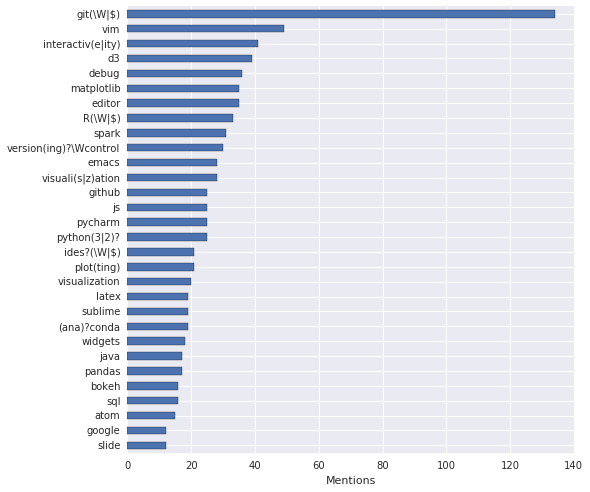

In [27]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [28]:
themes_df = tagged.themes.to_frame()

In [29]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [30]:
themes_df[column+'_keywords'] = ''

In [31]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [32]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [33]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(theme for theme in themes if theme)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keyword for keyword in keywords if keyword)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [34]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [35]:
themes_df.head(5)

,integrations_themes,integrations_keywords
1,"feature,version,language,app_lib_service","bokeh,interactiv(e|ity),plot(ting),git(\W|$),sql,js"
3,"version,platform,feature","version(ing)?\Wcontrol,git(\W|$),dashboard,docker"
6,"feature,app_lib_service","sphinx,slides,binder,slide"
7,"feature,app_lib_service","pelican,ipython,phantomx,github,shiny,blog,sphinx,dashboard"
9,"platform,feature","visuali(s|z)ation,orchestrat,api(\W|$),docker,interactiv(e|ity)"


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [36]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [37]:
themes_df.to_csv(column + '_themes.csv', sep=';')